<a href="https://colab.research.google.com/github/pachterlab/monod_examples/blob/main/Monod_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Monod* on Colab

In the current notebook, we apply *Monod* to identify differentially regulated genes between GABAergic and glutamatergic cell types in a single Allen dataset. 

# Inference pipeline

## Install prerequisites

In [1]:
# # %%capture
# # !pip install -i https://test.pypi.org/simple/ -U --extra-index-url https://pypi.org/simple   monod  
# # !pip install -i https://pypi.org/simple/  monod  
# !pip install monod

Let's make sure that the version is correct.

In [2]:
# !pip show monod

## Import data

In [3]:
# ! git clone https://github.com/pachterlab/monod_examples.git

In [6]:
# !rm -r sample_data

In [7]:
# !mv monod_examples/* .

In [8]:
# !rm -r monod_examples

In [9]:
# !mv sample_data/* .

In [10]:
# !rmdir sample_data

In [4]:
# !cat allen_C01_gaba.tar.gz.* | tar xzvf -

In [5]:
# !mv home/ggorin/projects/monod_examples/sample_data/allen_C01_gaba.loom .

In [6]:
# !cat allen_C01_glu.tar.gz.* | tar xzvf -

In [7]:
# !mv home/ggorin/projects/monod_examples/sample_data/allen_C01_glu.loom .

In [8]:
# !rm -r  ./home

In [9]:
# !rm *.tar.*

## Import package components

In [1]:
# import monod
# from monod import preprocess, extract_data, cme_toolbox, inference, analysis

import matplotlib.pyplot as plt
import numpy as np

In [1]:
# execfile("src/monod/cme_toolbox.py")
# execfile("src/monod/extract_data.py")
# execfile("src/monod/preprocess.py")
# execfile("src/monod/inference.py")
# execfile("src/monod/analysis.py")

In [2]:
# execfile("src/monod/preprocess.py")
import sys
sys.path.insert(0, '/home/cat/monod/src/monod')

import preprocess, extract_data, cme_toolbox, inference, analysis

In [3]:
import importlib

importlib.reload(cme_toolbox)
importlib.reload(preprocess)
importlib.reload(extract_data)
importlib.reload(inference)
importlib.reload(analysis)

import logging, sys
logging.basicConfig(stream=sys.stdout)
log = logging.getLogger()
log.setLevel(logging.INFO)
import warnings
warnings.filterwarnings("ignore") #warning suppression within script is not respected by colab
warnings.simplefilter('ignore')

## Define metadata

In [4]:
dataset_names = ['allen_C01_gaba','allen_C01_glu'] 
loom_filepaths = ['./monod_examples/sample_data/'+x+'.loom' for x in dataset_names] 

# transcriptome_filepath = './polyA_ref/gg_200524_mouse_genome_polyA_cum_1'
transcriptome_filepath = 'monod_examples/polyA_ref/gg_200524_mouse_genome_polyA_cum_1'
attribute_names=[('unspliced','spliced'),'gene_name','barcode']

## Run pre-processing

INFO:root:Beginning data preprocessing and filtering.
INFO:root:Batch location ./fits already exists.
INFO:root:Directory ./fits/gg_240725_029_batch_1 created.
INFO:root:Dataset: allen_C01_gaba
INFO:root:728 cells detected.
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:3576 genes retained after expression filter.
INFO:root:Directory ./fits/gg_240725_029_batch_1/allen_C01_gaba created.
INFO:root:Dataset: allen_C01_glu
INFO:root:6629 cells detected.
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:5517 genes retained after expression filter.
INFO:root:Directory ./fits/gg_240725_029_batch_1/allen_C01_glu created.
INFO:root:Gene set size according to a 100.0% dataset threshold: 3348
INFO:root:100 random genes selected.
INFO:root:Total of 100 genes selected.
INFO:root:Directory ./fits/gg_240725_029_batch_1/diagnostic_figures created.
INFO:root:Beginning data extraction.
INFO:root:Dataset: allen_

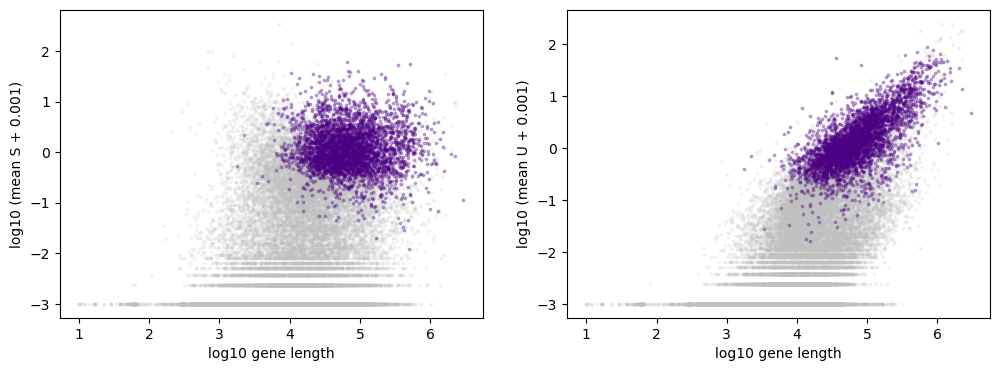

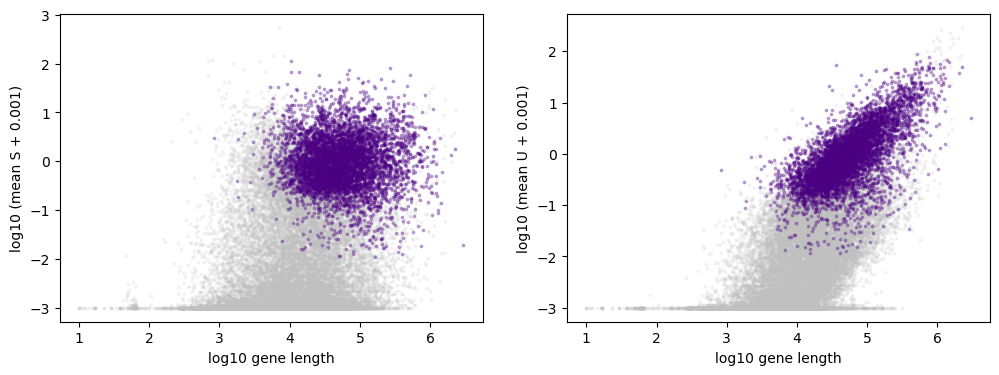

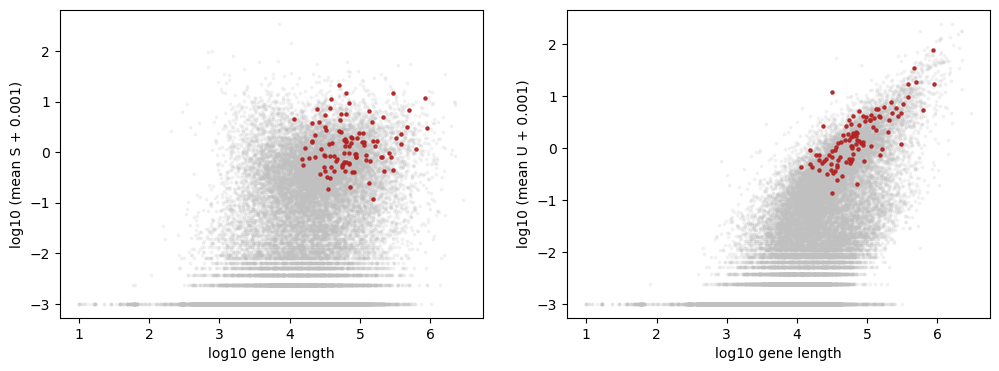

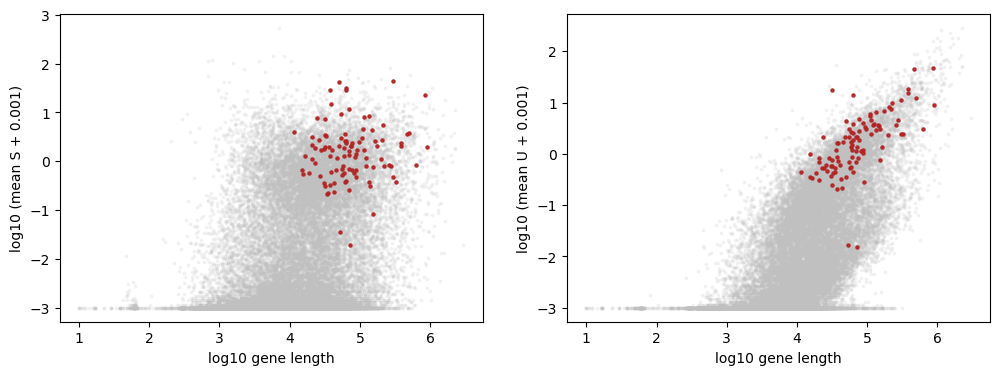

In [5]:
# exp filter, filt_param?
search_data_objects, dataset_strings = extract_data.extract_comb(loom_filepaths, \
                     transcriptome_filepath, \
                     dataset_names, \
                     attribute_names=attribute_names)

## Run inference

In this example, we will fit the bursty model to the two cell types, using a Poisson sampling model on a $6\times 7$ grid. For this Colaboratory notebook, we only use 5 iterations from the MoM estimate. 

In [138]:
n_datasets = len(dataset_names)

result_strings = []

for i in range(n_datasets):
    
    search_data = search_data_objects[i]
    
    fitmodel = cme_toolbox.CMEModel('Bursty','Poisson')
    
    inference_parameters = inference.InferenceParameters(dataset_strings[i],fitmodel, gradient_params={
            "max_iterations": 1,
            "init_pattern": "moments",
            "num_restarts": 1,
        })

    # Fit the model at all values of technical parameters, and save the location of the results.
    full_result_string = inference_parameters.fit_all_grid_points(search_data)
    
    result_strings.append(full_result_string)

INFO:root:Directory ./fits/gg_240626_026_batch_1/allen_C01_gaba/Bursty_Poisson_6x7 already exists.
INFO:root:Global inference parameters stored to ./fits/gg_240626_026_batch_1/allen_C01_gaba/Bursty_Poisson_6x7/parameters.pr.
INFO:root:Starting non-parallelized grid scan.
INFO:root:Non-parallelized grid scan complete.
INFO:root:All grid point data cleaned from disk.
INFO:root:Directory ./fits/gg_240626_026_batch_1/allen_C01_gaba/Bursty_Poisson_6x7/analysis_figures already exists.
before
INFO:root:Grid scan results stored to ./fits/gg_240626_026_batch_1/allen_C01_gaba/Bursty_Poisson_6x7/grid_scan_results.res.
after
INFO:root:Runtime: 69.5 seconds.
INFO:root:Directory ./fits/gg_240626_026_batch_1/allen_C01_glu/Bursty_Poisson_6x7 already exists.
INFO:root:Global inference parameters stored to ./fits/gg_240626_026_batch_1/allen_C01_glu/Bursty_Poisson_6x7/parameters.pr.
INFO:root:Starting non-parallelized grid scan.
INFO:root:Non-parallelized grid scan complete.
INFO:root:All grid point data

In [35]:
%%capture
!tar -czvf sample_fits.tar.gz fits

# Analysis

## Load Results into Monod Objects

In [ ]:
# # Recreate result strings if necessary.
# dir_string = '/'.join(dataset_strings[0].split('/')[:-1])
# dataset_strings = [dir_string+'/'+x for x in dataset_names]
# result_strings = [x+'/Bursty_Poisson_{}x{}/grid_scan_results.res'.format(grid[0],grid[1]) for x in dataset_strings]

In [107]:
result_strings

['./fits/gg_240626_026_batch_1/allen_C01_gaba/Bursty_Poisson_6x7/grid_scan_results.res',
 './fits/gg_240626_026_batch_1/allen_C01_glu/Bursty_Poisson_6x7/grid_scan_results.res']

In [139]:
# Load results and data.
search_results = [analysis.load_search_results(x) for x in result_strings]
search_datas = [analysis.load_search_data(x+'/raw.sd') for x in dataset_strings]
# Choose a dataset for further analysis
chosen_dataset = 0
search_result, search_data = search_results[chosen_dataset], search_datas[chosen_dataset]
print('Analyzing', result_strings[chosen_dataset])

INFO:root:Grid scan results loaded from ./fits/gg_240626_026_batch_1/allen_C01_gaba/Bursty_Poisson_6x7/grid_scan_results.res.
INFO:root:Grid scan results loaded from ./fits/gg_240626_026_batch_1/allen_C01_glu/Bursty_Poisson_6x7/grid_scan_results.res.
INFO:root:Search data loaded from ./fits/gg_240626_026_batch_1/allen_C01_gaba/raw.sd.
INFO:root:Search data loaded from ./fits/gg_240626_026_batch_1/allen_C01_glu/raw.sd.
Analyzing ./fits/gg_240626_026_batch_1/allen_C01_gaba/Bursty_Poisson_6x7/grid_scan_results.res


## Get Parameter Values

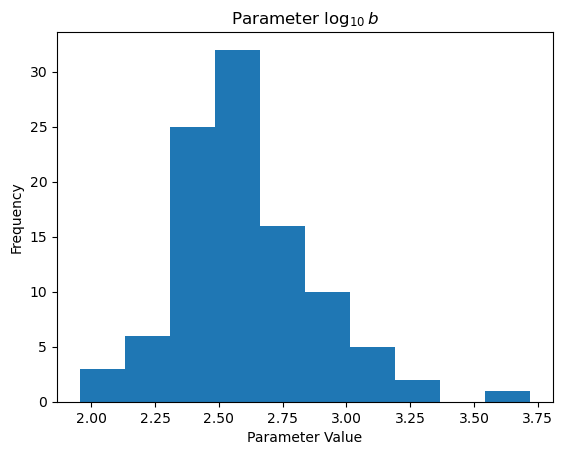

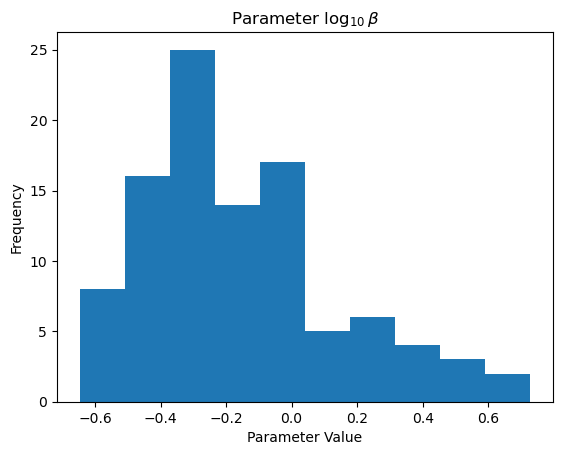

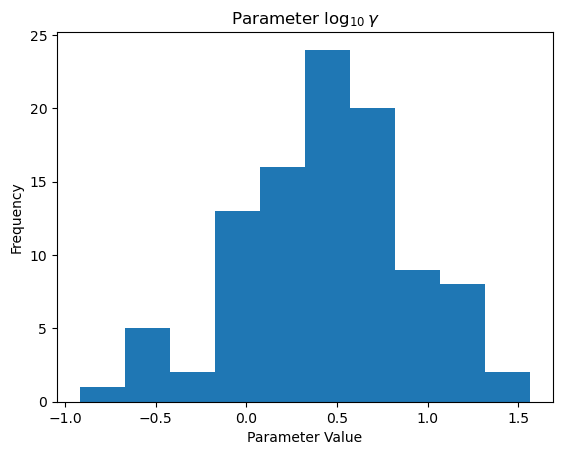

In [140]:
search_result.find_sampling_optimum(discard_rejected=False)
parameters_per_gene = search_result.phys_optimum
num_params = search_result.model.get_num_params() #np.shape(parameters_per_gene)[1]

# Plot parameter histograms.
for i in range(num_params):
    plt.hist([j for j in parameters_per_gene[:,i]])
    plt.title('Parameter ' + search_result.model.param_str[i])
    plt.xlabel('Parameter Value')
    plt.ylabel('Frequency')
    plt.show()

## Get Parameter Errors

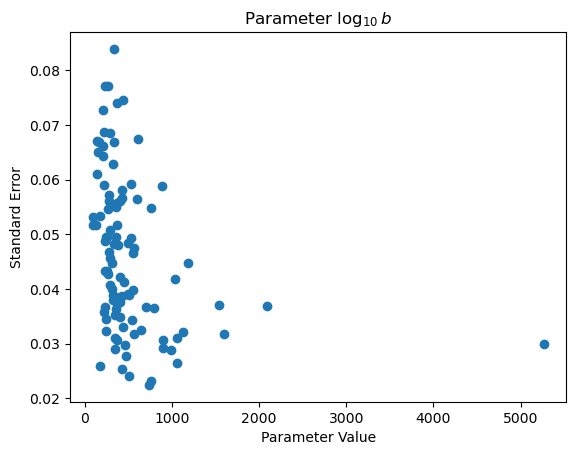

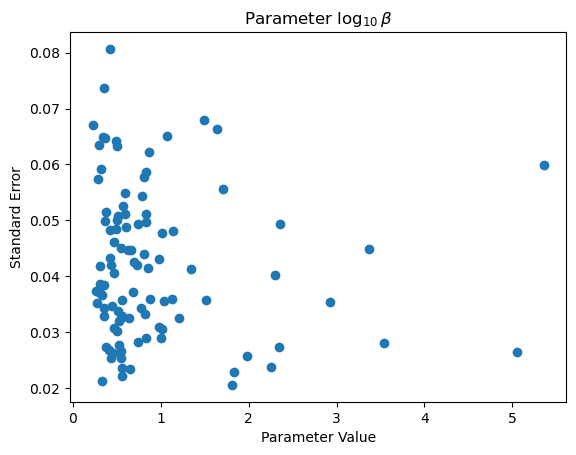

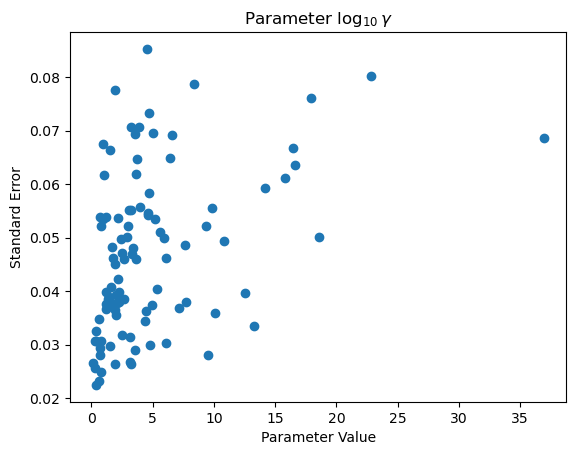

In [125]:
search_result.compute_sigma(search_data,num_cores=1)
sigmas = search_result.sigma

# Plot dispersion.
for i in range(num_params):
    plt.scatter([10**j for j in parameters_per_gene[:,i]], sigmas[:,i])
    plt.title('Parameter ' + search_result.model.param_str[i])
    plt.xlabel('Parameter Value')
    plt.ylabel('Standard Error')
    plt.show()

## Perform Chi-Squared Testing

In [ ]:
# # To calculate chi-squared values for each gene, run the following:
# search_result.chisquare_testing(search_data)
# To check stability after rejecting genes, run the following:
search_result.chisq_best_param_correction(search_data, Ntries=0, viz=False)

## Display Rejected Genes

In [81]:
# Calculate p values and reject genes.
rejected_gene_indices = search_result.rejected_genes
rejected_gene_names = search_result.gene_names[rejected_gene_indices]
print(rejected_gene_names)

INFO:root:Chi-square computation complete. Rejected 34 genes out of 100. Runtime: 0.3 seconds.
['Prox1' 'Ro60' 'Cntnap5a' 'Col19a1' 'Hlf' 'Papola' 'Adcy2' 'Edil3'
 'Gfod1' 'Basp1' 'Azin1' 'Pde10a' 'Dlgap1' 'Camk2a' 'Eef1g'
 '9930021J03Rik' 'Olfm1' 'Gpcpd1' 'Fam171b' 'Slc12a5' 'Ak5' 'Gm3764'
 'Clstn1' 'Eif4g3' 'Hectd4' 'Tmem178b' 'Atp2b2' 'Tshz3' 'Fam168a' 'Nfat5'
 'Map4' 'Pknox2' 'Pcdh11x' 'Gm47283']


# Perform QC

Inspect all bursty result files and perform basic QC. We would like to be confident of the typical results:

*   The fits successfully recapitulate the joint count distributions
*   The sampling parameters appear to have a single unique optimum in $\{C_u, \lambda_s\}$
*   The physical parameters $\{b,\beta,\gamma\}$ are largely independent of gene length
*   The physical parameter distributions are consistent with a normal-inverse Gaussian law

In [105]:
def run_qc(j):
    sr = search_results[j]
    sd = search_datas[j]
    fig1,ax1 = plt.subplots(1,1)
    sr.find_sampling_optimum()
    sr.plot_landscape(ax1)

    fig1,ax1 = plt.subplots(1,1)
    sr.plot_KL(ax1)

    sr.plot_gene_distributions(sd,marg='joint')

    _=sr.chisquare_testing(sd)
    sr.resample_opt_viz()
    sr.resample_opt_mc_viz()
    sr.chisq_best_param_correction(sd,viz=True) 

    sr.compute_sigma(sd,num_cores=1) #colab has a hard time with multiprocessing
    sr.plot_param_L_dep(plot_errorbars=True,plot_fit=True)
    sr.plot_param_marg()
    analysis.make_batch_analysis_dir([sr],dir_string)
    sr.update_on_disk()

INFO:root:Figure stored to ./fits/gg_240626_026_batch_1/allen_C01_gaba/Bursty_Poisson_6x7/analysis_figures/kldiv.png.
INFO:root:Figure stored to ./fits/gg_240626_026_batch_1/allen_C01_gaba/Bursty_Poisson_6x7/analysis_figures/gene_distributions_joint.png.
INFO:root:Chi-square computation complete. Rejected 34 genes out of 100. Runtime: 0.3 seconds.
INFO:root:Figure stored to ./fits/gg_240626_026_batch_1/allen_C01_gaba/Bursty_Poisson_6x7/analysis_figures/subsampling.png.
INFO:root:Figure stored to ./fits/gg_240626_026_batch_1/allen_C01_gaba/Bursty_Poisson_6x7/analysis_figures/subsampling_stability.png.
INFO:root:Original optimum: -7.40, -2.00.
INFO:root:Chi-square computation complete. Rejected 34 genes out of 100. Runtime: 0.3 seconds.
INFO:root:New optimum: -7.40, -2.00.
INFO:root:Chi-square computation complete. Rejected 34 genes out of 100. Runtime: 0.3 seconds.
INFO:root:New optimum: -7.40, -2.00.
INFO:root:Chi-square computation complete. Rejected 34 genes out of 100. Runtime: 0.3 

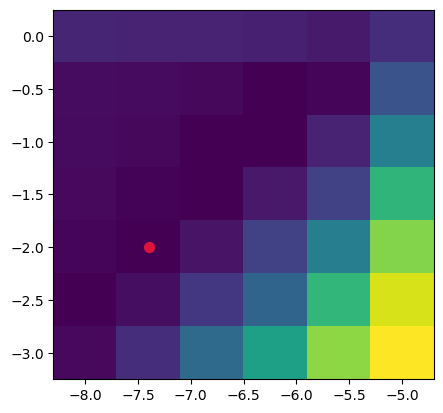

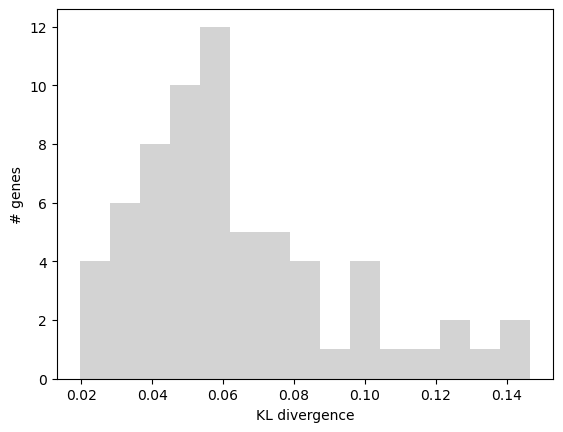

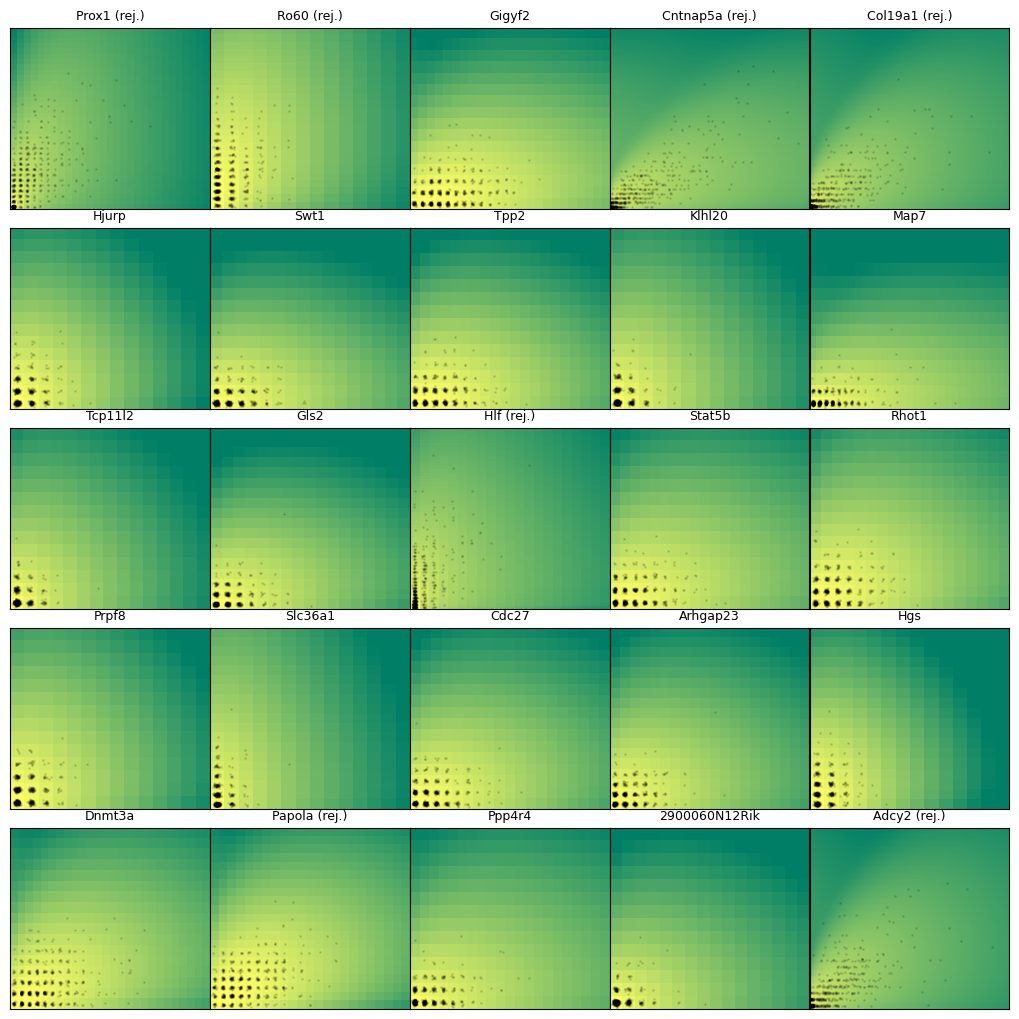

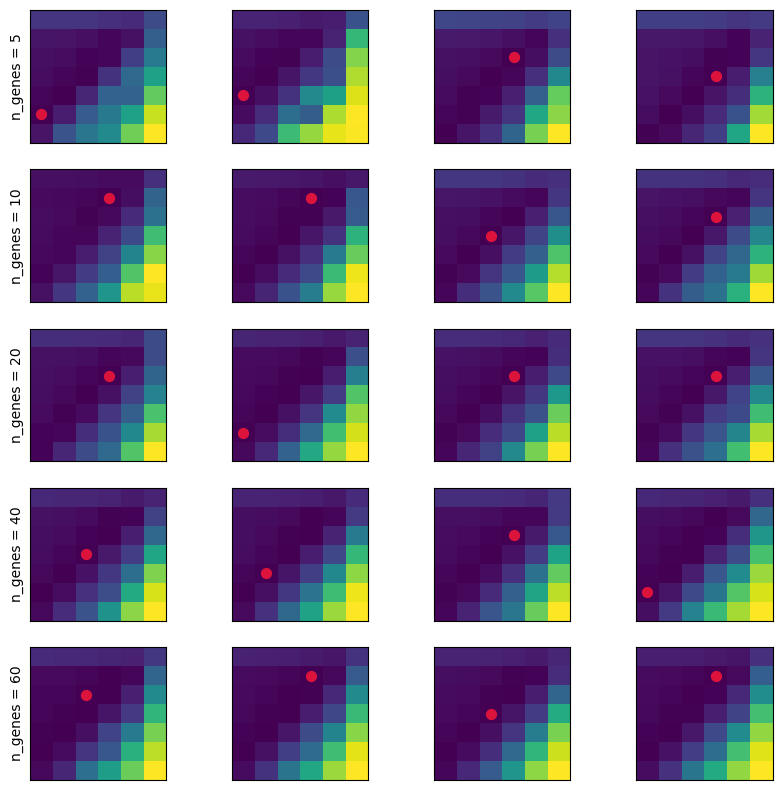

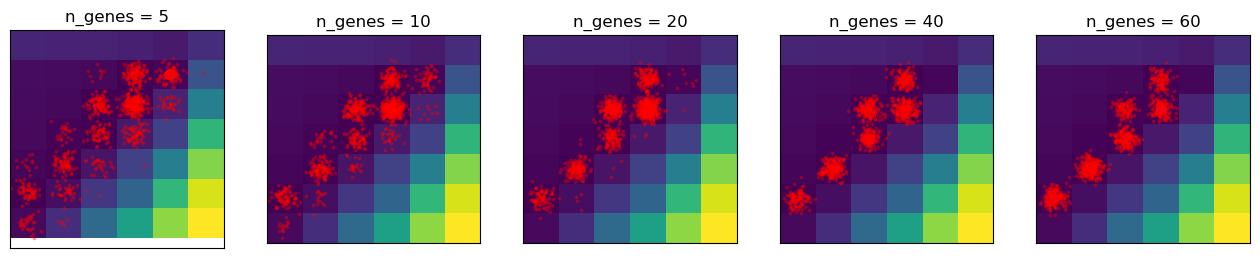

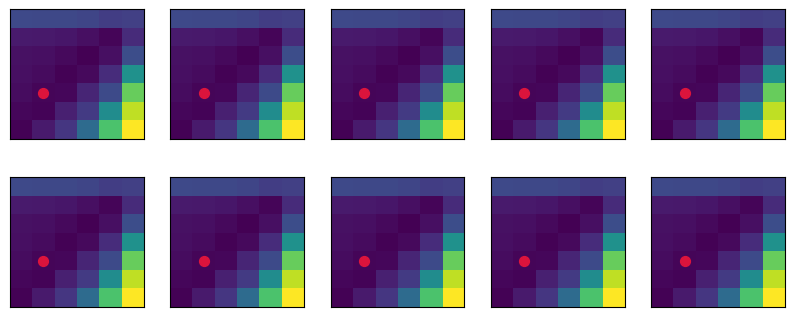

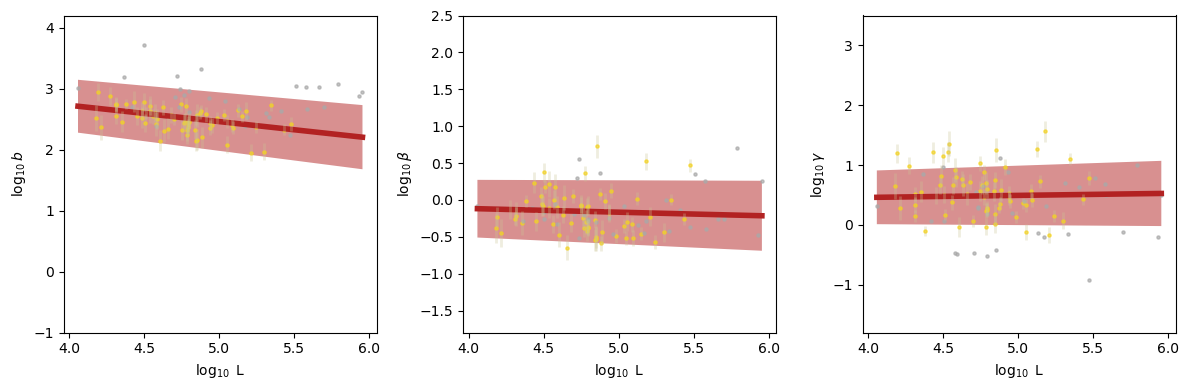

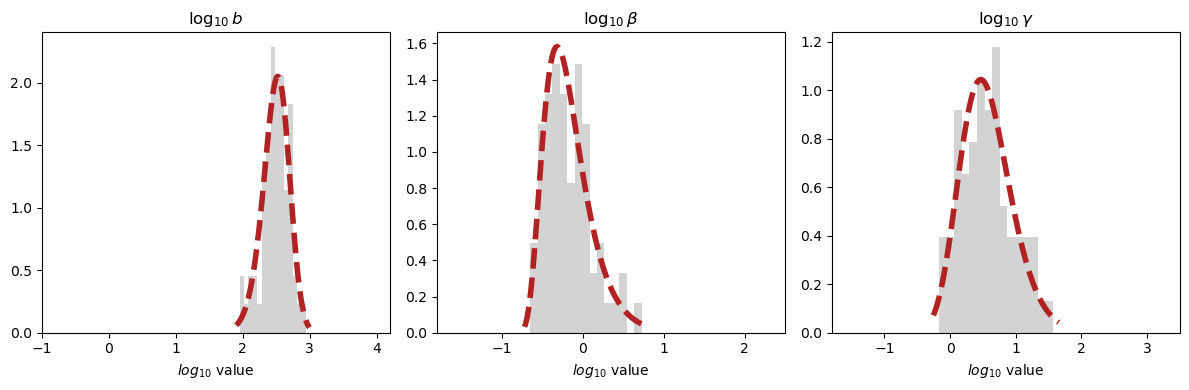

In [106]:
run_qc(0)

In [27]:
%%capture
!tar -czvf sample_fits.tar.gz fits